In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import math
import seaborn as sns

In [2]:
data = pd.read_csv("E:\Downloads\mcdonalds.csv")

In [3]:
## R> colnames(vac)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
## Showing first three rows of the dataframe

In [6]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
df = pd.DataFrame(data)

In [8]:
## Converting yes to 1 and no to 0

In [9]:
df.iloc[:, :11] = df.iloc[:, :11].replace({'Yes': 1, 'No': 0})

/var/folders/cb/jf0s8qld34727fjc4j4rxbdc0000gn/T/ipykernel_77869/4124229157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, :11] = df.iloc[:, :11].replace({'Yes': 1, 'No': 0})


In [10]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [11]:
for col in df.columns[:11]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(12), object(3)
memory usage: 170.4+ KB


In [13]:
## Descriptive statistics of converted data

In [14]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [15]:
## performing PCA

In [16]:
columns_pca= df.columns[:11]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_pca])

In [47]:
scaled_data.dtype

dtype('float64')

In [43]:
pca = PCA(n_components=11)  # Number of components to keep
principal_components = pca.fit_transform(scaled_data)
original_components = pca.fit(scaled_data)

In [18]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7','Principal Component 8','Principal Component 9','Principal Component 10','Principal Component 11'])

In [19]:
## Factor loading

In [20]:
print(principal_df)

      Principal Component 1  Principal Component 2  Principal Component 3  \
0                  0.704334              -0.437016               0.268698   
1                 -0.467820               0.364277              -1.596835   
2                  0.191986               1.712949              -0.339413   
3                 -0.116991              -1.155122              -1.003913   
4                 -0.034724              -1.390267               0.792275   
...                     ...                    ...                    ...   
1448               3.499105               1.069999               0.148971   
1449              -1.568786               0.899328               1.192503   
1450              -0.414275               1.810438              -1.071948   
1451              -2.803630               0.562759               2.278887   
1452               3.499105               1.069999               0.148971   

      Principal Component 4  Principal Component 5  Principal Component 6  

In [21]:
## Explained Variance Ratio:

In [22]:
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


In [23]:
## Perceptual Map using component 1

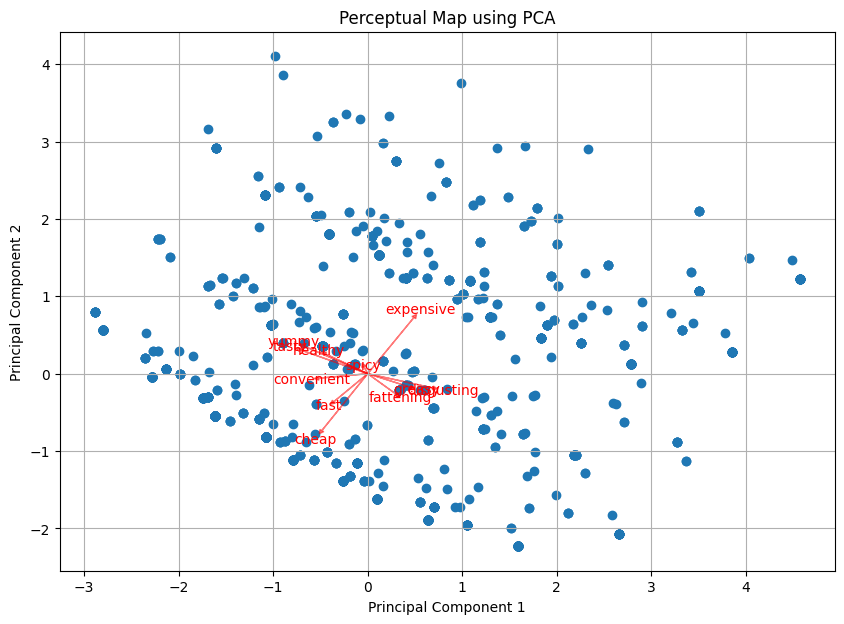

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])

# Annotate points with index or other identifiers
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(columns_pca):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='r', ha='center', va='center')
plt.title('Perceptual Map using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [25]:
## K means clustering

In [26]:
range_n_clusters = range(2, 9)
silhouette_avg_scores = []
inertia = []
cluster_labels = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_df)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(principal_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

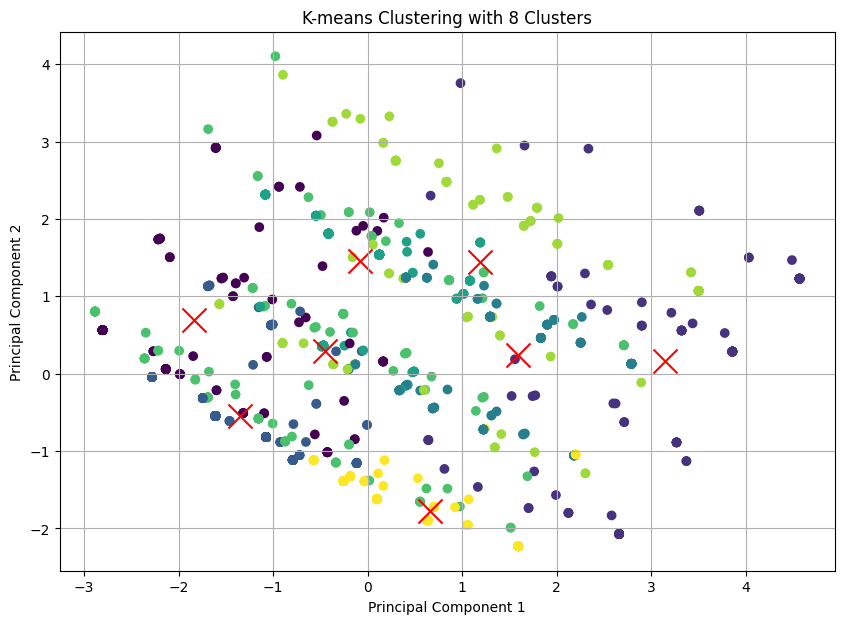

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title(f'K-means Clustering with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

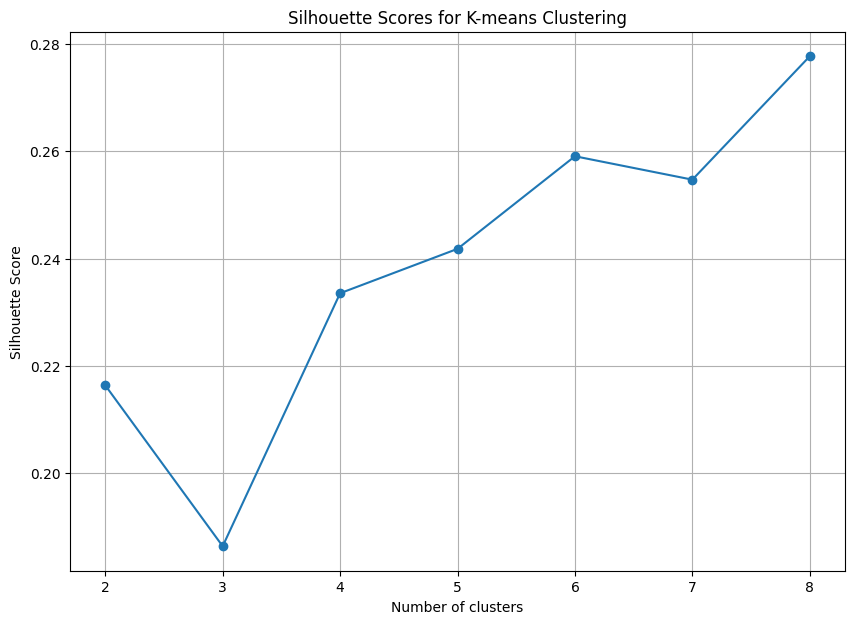

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [29]:
print("\nSilhouette Scores for different numbers of clusters:")
for n_clusters, score in zip(range_n_clusters, silhouette_avg_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")


Silhouette Scores for different numbers of clusters:
Number of clusters: 2, Silhouette Score: 0.216362548152205
Number of clusters: 3, Silhouette Score: 0.18635497112153473
Number of clusters: 4, Silhouette Score: 0.23353459294860654
Number of clusters: 5, Silhouette Score: 0.24181406340651707
Number of clusters: 6, Silhouette Score: 0.25908264165674816
Number of clusters: 7, Silhouette Score: 0.2547171932580692
Number of clusters: 8, Silhouette Score: 0.2777382050427693


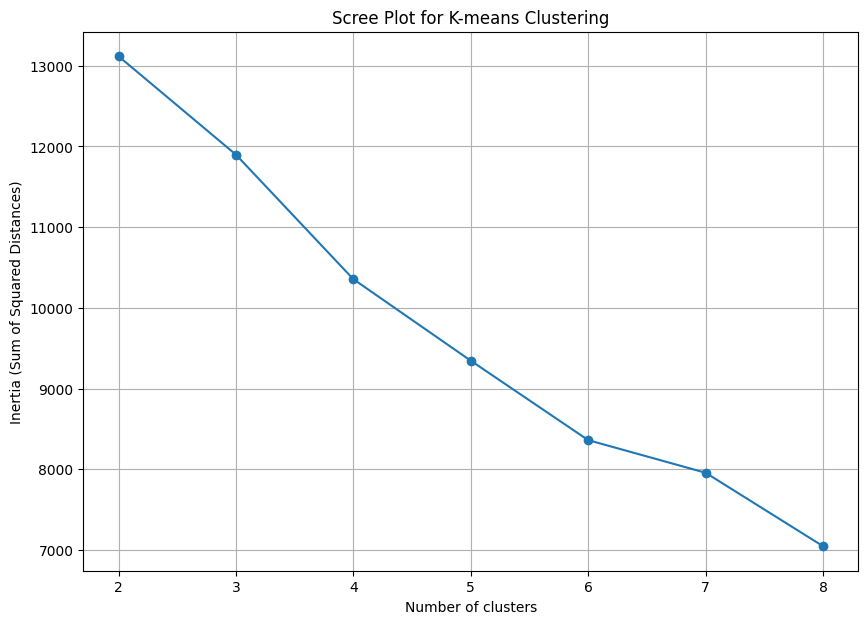

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Scree Plot for K-means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [50]:
## Performing Regression analysis